# ИСН – Методи и софтуер за машинно обучение – Курсов проект
## от: Божидар Ивов Топчийски
## фк.н 791323009
### Януари, 2024


# 1. Зареждане на данни чрез Pandas DataFrames


In [4]:
import pandas as pd

data = pd.read_csv('data/shuffle_email_spam_classification.csv') # read a dataset from a CSV file
type(data) # show the object type
print(data.shape) # show the number of rows and columns
print(data.columns) # columns names

(5172, 3002)
Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)


## Запознаваме се с данните

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [7]:
# Head and tail of the dataset
print(data.head(10))
print(data.tail(10))

  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
5   Email 6    4   5    1    4    2   3   45    1    0  ...         0    0   
6   Email 7    5   3    1    3    2   1   37    0    0  ...         0    0   
7   Email 8    0   2    2    3    1   2   21    6    0  ...         0    0   
8   Email 9    2   2    3    0    0   1   18    0    0  ...         0    0   
9  Email 10    4   4   35    0    1   0   49    1   16  ...         0    0   

   valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
0       0    0               0         0         0   0    0        

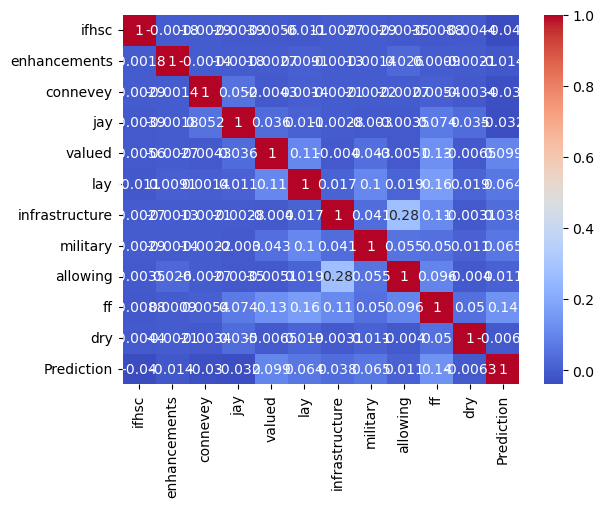

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

last_10_columns = data.columns[-12:]
corr = data[last_10_columns].corr()
# Plot the correlation heatmap.
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

# 2. Филтрираме данните

## Feature Selection

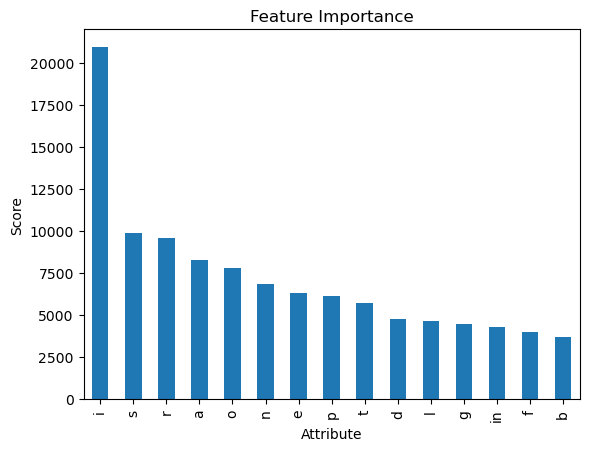

In [46]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Разграничаваме полето за спам от информацията за останалите полета
X = data.iloc[:, 1:-1]  # Данните за първите всички думи
Y = data['Prediction']    # Информация за спам

# init SelectKBest
best_fe = SelectKBest(score_func=chi2, k=500)

# fit (invokes the chi2 fun)
fit_obj = best_fe.fit(X, Y)

# the instance fit_obj has attributes scores_ and pvalues_
scores = pd.DataFrame(fit_obj.scores_)
pvals = pd.DataFrame(fit_obj.pvalues_)

# Get the column names
columns = pd.DataFrame(X.columns)

feature_scores = pd.concat([columns, scores, pvals], axis=1)  # Concatenate and obtain a DataFrame
feature_scores.columns = ['Attribute', 'Score', 'P-values']   # Set the DataFrame column names

# Select the n best (largest) scores
best_df_chi2 = feature_scores.nlargest(15, 'Score')
best_df_chi2.set_index('Attribute', inplace=True)
best_df_chi2['Score'].plot(kind='bar')
plt.ylabel('Score')
plt.title('Feature Importance')
plt.show()

## Dimensionality reduction

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Стандартизираме данните, като махаме средните стойности
X = StandardScaler().fit_transform(X)

pca_obj = PCA(n_components=5)
principal_components = pca_obj.fit_transform(X)

princomps_df = pd.DataFrame(data = principal_components, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

princomps_df.head(10)

,PC 1,PC 2,PC 3,PC 4,PC 5
0,-8.221281,-3.048321,0.403838,0.730413,0.384764
1,1.438846,-0.833272,0.741029,-1.398834,1.343607
2,-4.249546,0.075578,-2.081912,0.036117,0.141971
3,-7.359160,-2.584159,0.422988,0.346416,0.422179
4,17.521152,9.731922,5.097778,3.142793,6.133354
5,-6.714684,-3.086732,1.553765,-0.841915,-0.499751
6,-2.029114,-1.161152,2.467001,-0.784504,-0.697622
7,-3.913315,-0.033966,-1.865580,-0.619489,-0.788185
8,-6.748570,-2.343292,0.251540,0.501973,0.658429
9,28.590300,13.698264,-3.440790,-4.712000,5.415423


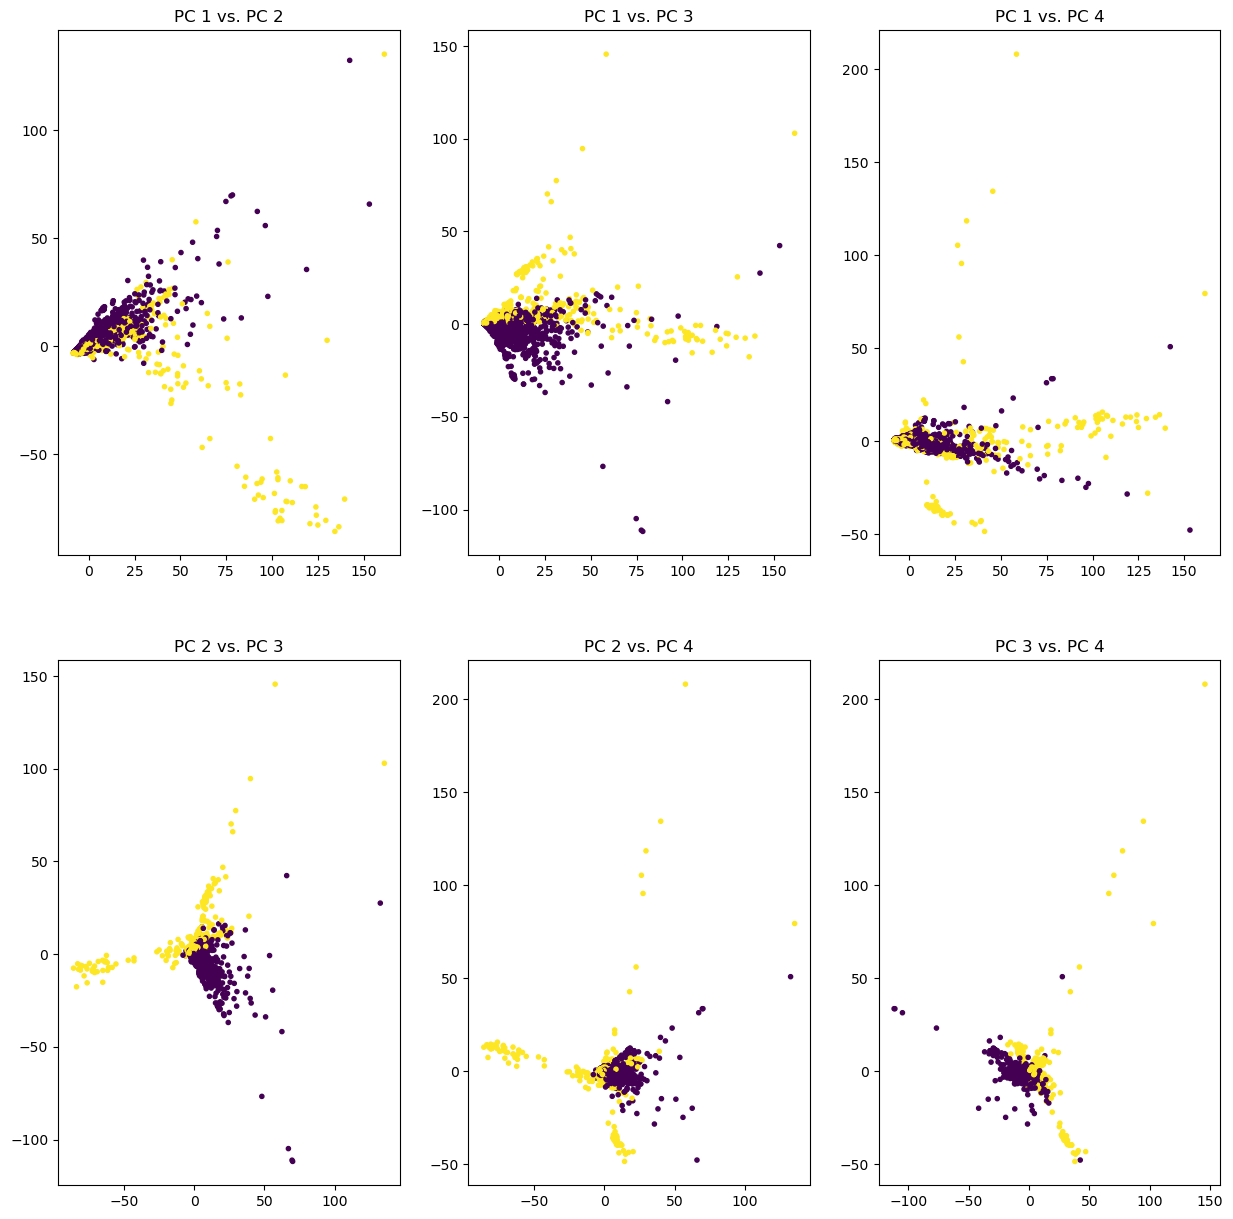

In [52]:
# Визуализация на компонентите
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15,15))

ax[0][0].set_title('PC 1 vs. PC 2')
ax[0][0].scatter(pc_df["PC 1"], pc_df["PC 2"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][1].set_title('PC 1 vs. PC 3')
ax[0][1].scatter(pc_df["PC 1"], pc_df["PC 3"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[0][2].set_title('PC 1 vs. PC 4')
ax[0][2].scatter(pc_df["PC 1"], pc_df["PC 4"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][0].set_title('PC 2 vs. PC 3')
ax[1][0].scatter(pc_df["PC 2"], pc_df["PC 3"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][1].set_title('PC 2 vs. PC 4')
ax[1][1].scatter(pc_df["PC 2"], pc_df["PC 4"], c = pc_df["Class"], cmap ='viridis', marker=".")

ax[1][2].set_title('PC 3 vs. PC 4')
ax[1][2].scatter(pc_df["PC 3"], pc_df["PC 4"], c = pc_df["Class"], cmap ='viridis', marker=".")

plt.show() 

# 3. Модели за класификация

## Разделяме данните за трениране и тестване на модела

In [54]:
import matplotlib.pyplot as plt
import math

# Взимаме произволни данни
data = data.sample(frac=1).reset_index(drop=True)
n = data.shape[0]  # row count
thr = math.floor(0.75*n)  #Threshold

# Подмножество за трениране
X_train = data.iloc[0:thr:, 1:-1]
Y_train = data.iloc[0:thr:, -1]

# Feature Selection
X_train = best_fe.transform(X_train)

# Standardizing and PCA
scal = StandardScaler()
X_train = scal.fit_transform(X_train)

# Подмножество за тестване
X_test = data.iloc[thr:n:, 1:-1]
Y_test = data.iloc[thr:n:, -1]
X_test = best_fe.transform(X_test) # Feature Selection

#Стандартизираме тестовите данни
X_test = scal.transform(X_test)

# Прилагаме PCA след Feature Selection и Standartization
pca_obj = PCA(n_components=5)
X_train = pca_obj.fit_transform(X_train)
X_test = pca_obj.transform(X_test)

## Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Създаваме модела
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)
predictions_LR = logreg.predict(X_test)

# Предсказваме 
print("All predictions: {0} \n\n\n".format(predictions_LR))
predict_actual = pd.DataFrame({'Predictions':predictions_LR, 'Actual':Y_test.values})
print(predict_actual)

# Проверяваме точността
confusion_mtx_LR = confusion_matrix(Y_test, predictions_LR)
print("Confusion matrix: \n{}".format(confusion_mtx_LR))

# Нека видим само точността
ACC = classification_report(Y_test, predictions_LR, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Всички метрики
print(classification_report(Y_test, predictions_LR, output_dict=False))

All predictions: [0 0 0 ... 0 0 1] 



      Predictions  Actual
0               0       0
1               0       0
2               0       0
3               0       0
4               1       1
...           ...     ...
1288            1       1
1289            1       1
1290            0       0
1291            0       0
1292            1       1

[1293 rows x 2 columns]
Confusion matrix: 
[[909  36]
 [ 34 314]]

#####   Accuracy: 94.58623356535189 %   ##### 



              precision    recall  f1-score   support

           0       0.96      0.96      0.96       945
           1       0.90      0.90      0.90       348

    accuracy                           0.95      1293
   macro avg       0.93      0.93      0.93      1293
weighted avg       0.95      0.95      0.95      1293



## Визуализация

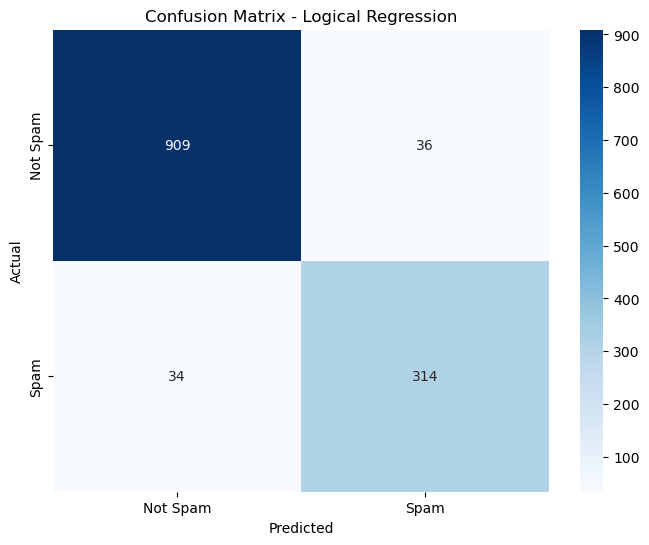

In [63]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_LR)

# Visualize the Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Logical Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier

# Създаваме модела
dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)

# Правим предсказания
predictions_DT = dtree.predict(X_test)

# Какви са предсказанията
print("All predictions: {0} \n\n\n".format(predictions_DT))
predict_actual_DT = pd.DataFrame({'Predicted': predictions_DT, 'Actual': Y_test.values})
print(predict_actual_DT)

# Каква е точността
confusion_mtx_DT = confusion_matrix(Y_test, predictions_DT)
print("Confusion matrix: \n{}".format(confusion_mtx_DT))
ACC_DT = classification_report(Y_test, predictions_DT, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC_DT * 100))

# Всички метрики
print(classification_report(Y_test, predictions_DT, output_dict=False))

All predictions: [0 0 0 ... 0 0 1] 



      Predicted  Actual
0             0       0
1             0       0
2             0       0
3             0       0
4             1       1
...         ...     ...
1288          0       1
1289          1       1
1290          0       0
1291          0       0
1292          1       1

[1293 rows x 2 columns]
Confusion matrix: 
[[896  49]
 [ 36 312]]

#####   Accuracy: 93.4261407579273 %   ##### 



              precision    recall  f1-score   support

           0       0.96      0.95      0.95       945
           1       0.86      0.90      0.88       348

    accuracy                           0.93      1293
   macro avg       0.91      0.92      0.92      1293
weighted avg       0.94      0.93      0.93      1293



## Визуализация

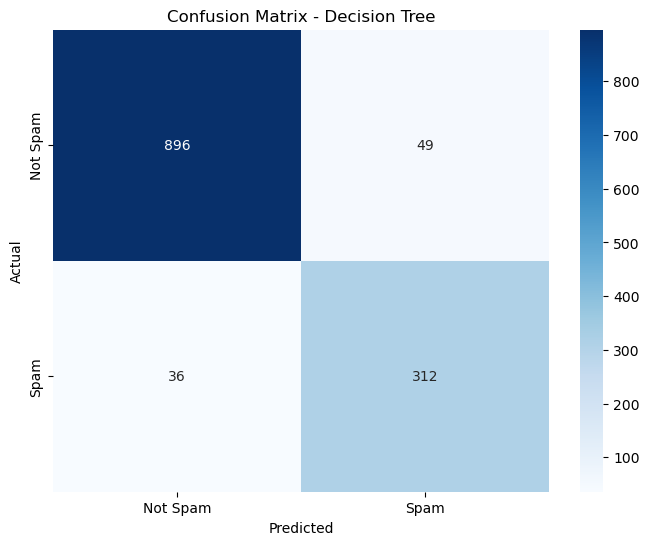

In [65]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, predictions_DT)

# Visualize the Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', 
            xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Производителност (K-fold cross validation)

## Logistic Regression

In [71]:
from sklearn.model_selection import cross_val_score

# Прилагане на k-Fold Cross-Validation с k=5
scores = cross_val_score(logreg, X_train, Y_train, cv=5, scoring='accuracy')

# Извеждане на средната точност и стандартното отклонение
print(f"Средна точност: {scores.mean()}")
print(f"Стандартно отклонение: {scores.std()}")

Средна точност: 0.9448307283006319
Стандартно отклонение: 0.00584713208608123


## Decision Tree

In [72]:
# Прилагане на k-Fold Cross-Validation с k=5
scores = cross_val_score(dtree, X_train, Y_train, cv=5, scoring='accuracy')

# Извеждане на средната точност и стандартното отклонение
print(f"Средна точност: {scores.mean()}")
print(f"Стандартно отклонение: {scores.std()}")

Средна точност: 0.923177918190888
Стандартно отклонение: 0.011956422752193663


# 5. Заключение

Средната точност на Logistic Regression е по-висока от тази на Decision Tree:

## Логистична регресия (Logistic Regression):

Средна точност: 94.48%
Стандартно отклонение: 0.58%

## Дърво на решения (Decision Tree):
Средна точност: 92.32%
Стандартно отклонение: 1.20%

Логистичната регресия има по-висока средна точност и по-ниско стандартно отклонение в сравнение с Дървото на решения.

Високата средна точност на логистичната регресия може да свидетелства за добра обобщителна способност на модела към нови данни.
Стандартното отклонение е по-ниско при логистичната регресия, което показва по-малка вариация в точността при различните крос-валидации.

В заключение, в момента логистичната регресия изглежда като по-добър избор, осигурявайки по-стабилна и висока точност при обработка на данни.




